In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('./monthly.csv')

In [3]:
df.head()

,Month,Monet_Revenue,Average_sales,PY_Revenue,Actual_Revenue
0,January,7802891,9.924382e+06,6781877.43,8374395
1,February,5497707,9.430600e+06,4744289.00,6125313
2,March,5877816,1.082231e+07,5681350.00,6706351
3,April,7440040,1.155473e+07,6083476.00,7678406
4,May,6365606,1.135337e+07,5347432.00,6530005


In [41]:
df.shape

(6, 5)

In [5]:
df.columns

Index(['Month', 'Monet_Revenue', 'Average_sales', 'PY_Revenue',
       'Actual_Revenue'],
      dtype='object')

<h4>Visualize the data to determine the best model to use</h4>

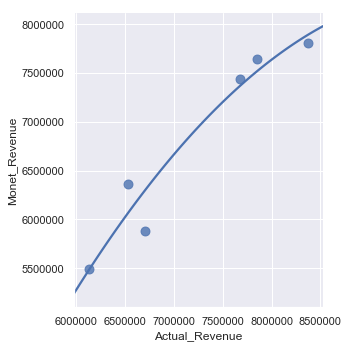

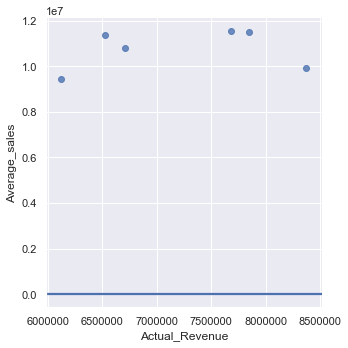

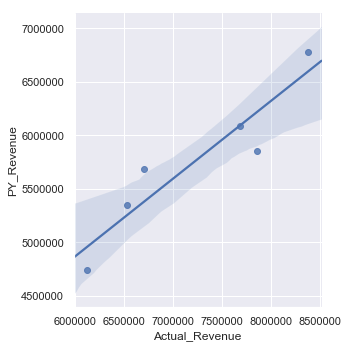

In [67]:
sns.set(color_codes=True)

ax = sns.lmplot(x = 'Actual_Revenue', y = 'Monet_Revenue',data = df,order=2, ci=None, scatter_kws={"s": 80})

ay=sns.lmplot(y='Average_sales',x='Actual_Revenue', data=df, logistic=True,y_jitter=.03)

az=sns.lmplot(y='PY_Revenue',x='Actual_Revenue', data=df)

<h4>Declare all the columns you want to use as features</h4>

In [49]:
features=['Average_sales','PY_Revenue']

<H4>Specify the predicition target</H4>

In [8]:
target=['Actual_Revenue']

<h4>Extract features and targets into seperate data frames and clean the data</h4>

In [10]:
df.dropna()

,Month,Monet_Revenue,Average_sales,PY_Revenue,Actual_Revenue
0,January,7802891,9.924382e+06,6781877.43,8374395
1,February,5497707,9.430600e+06,4744289.00,6125313
2,March,5877816,1.082231e+07,5681350.00,6706351
3,April,7440040,1.155473e+07,6083476.00,7678406
4,May,6365606,1.135337e+07,5347432.00,6530005
5,June,7642201,1.151263e+07,5849548.00,7851158


In [50]:
x = df[features]

In [12]:
y = df[target]

In [13]:
x.iloc[2]

Monet_Revenue     5877816.0
Average_sales    10822314.0
PY_Revenue        5681350.0
Name: 2, dtype: float64

<H4>Split the data set into training and testing sets</H4>

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=36)

In [15]:
y_train


,Actual_Revenue
0,8374395
4,6530005
2,6706351
5,7851158


In [52]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
y_prediction=regressor.predict(x_test)
y_prediction

array([[8453363.47373614],
       [3047420.12208532]])

In [54]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [55]:
RMSE

2244324.3586898716

In [24]:
regressor = DecisionTreeRegressor(max_depth=20)#tree has a depth. Max depth is 20
regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [25]:
y_prediction = regressor.predict(x_test)
y_prediction

array([7851158., 6706351.])

In [26]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [27]:
print(RMSE)

428630.61658495653


In [71]:
x_test

,Monet_Revenue,Monet_Pax
5,7642201,47925
2,5877816,37855


In [56]:
y_pred=regressor.predict(np.array([12600047.,7184674.]).reshape(1, -1))

In [57]:
y_pred

array([[12154242.19618489]])